# Loan Default Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
df=pd.read_csv("data\\Loan_default.csv")

## Data Exploration & Cleaning

In [6]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
data_types = df.dtypes
categories = ['Numeric' if dtype in ['int64', 'float64'] else 'Categorical' for dtype in data_types]
type_counts = pd.Series(categories).value_counts()


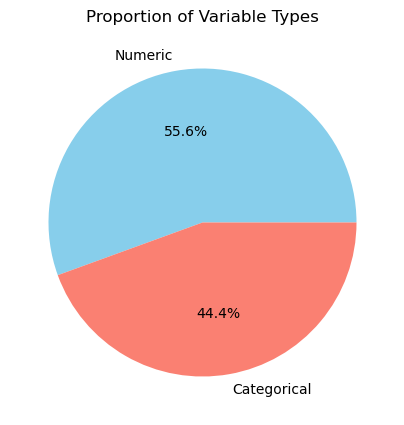

In [12]:
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Proportion of Variable Types")
plt.show()


In [14]:
#Number of records and features
df.shape

(255347, 18)

In [16]:
#Remove duplicates
df = df.drop_duplicates()

In [18]:
#Number of records and features after removing duplicates
df.shape

(255347, 18)

In [20]:
#Check for null values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

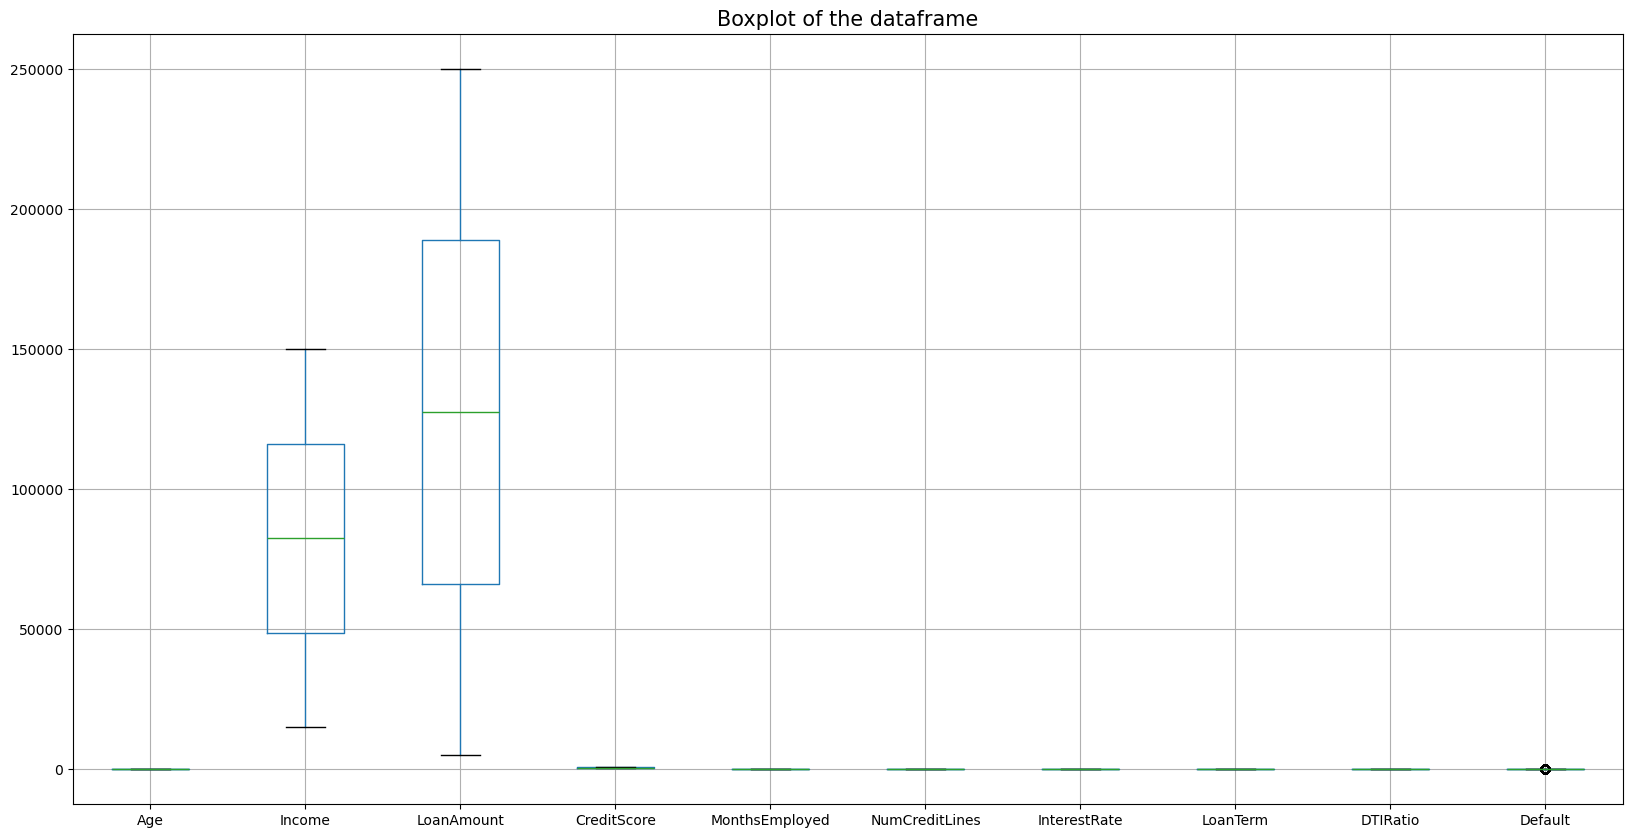

In [22]:
#Checking for outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

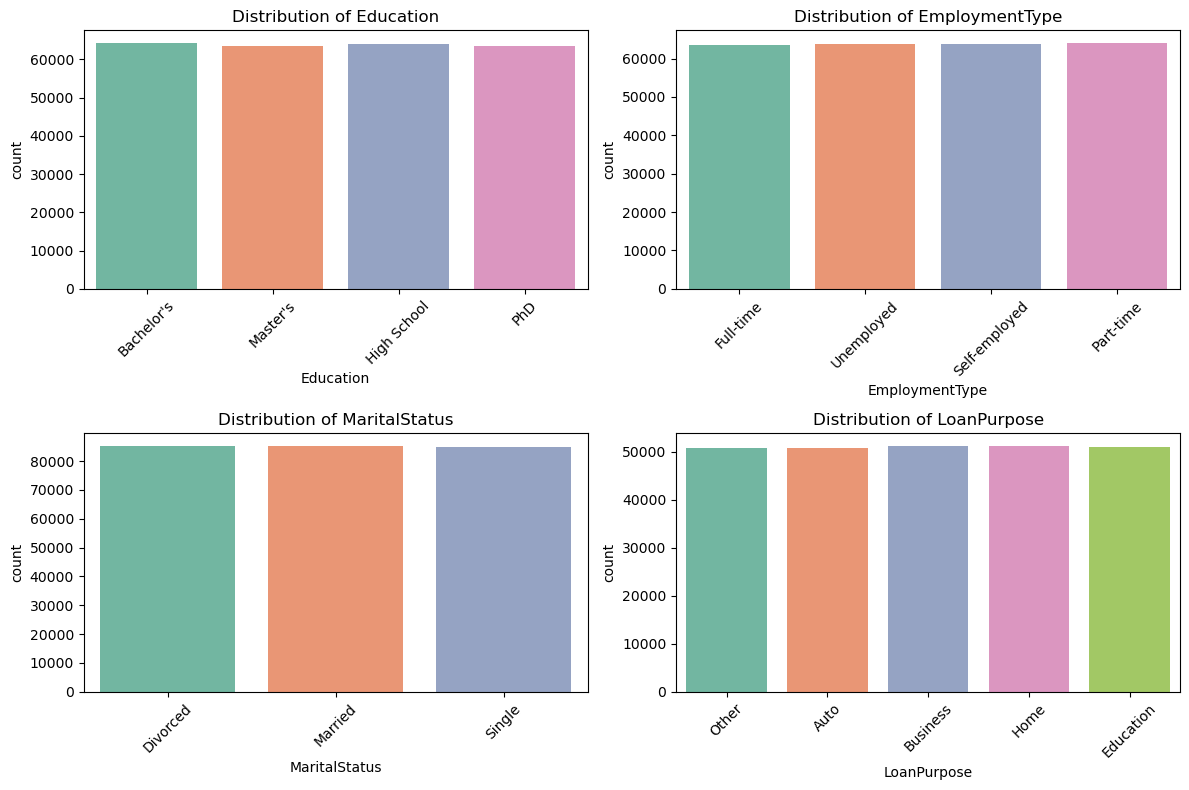

In [24]:
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


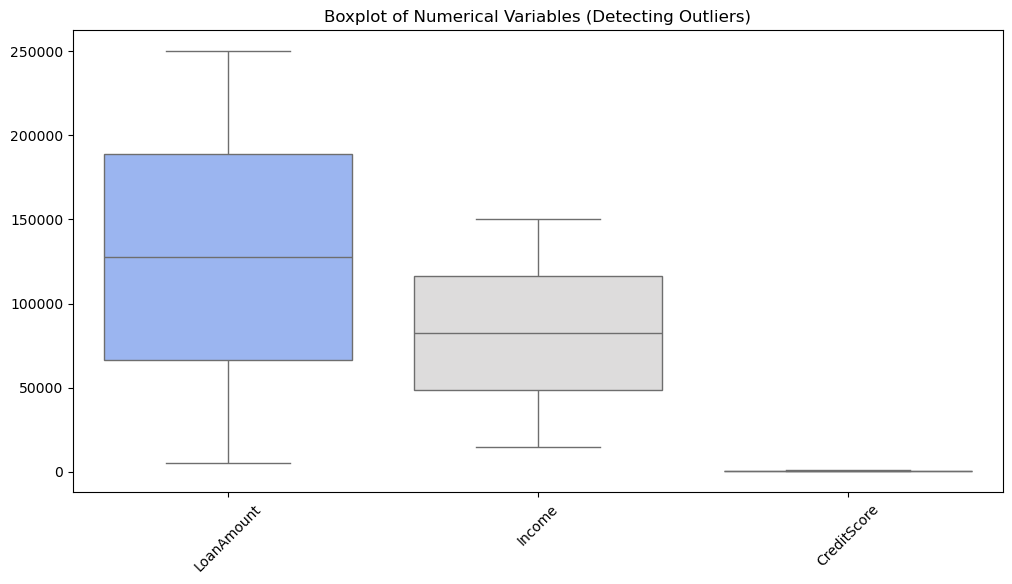

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LoanAmount', 'Income', 'CreditScore']], palette="coolwarm")
plt.title("Boxplot of Numerical Variables (Detecting Outliers)")
plt.xticks(rotation=45)
plt.show()


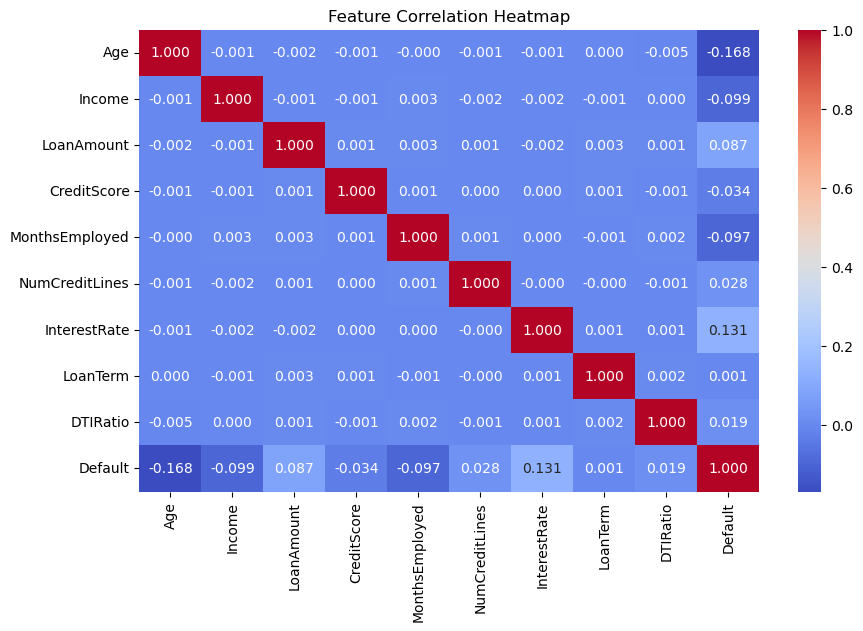

In [26]:
#Feature Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Correlation Heatmap")
plt.show()



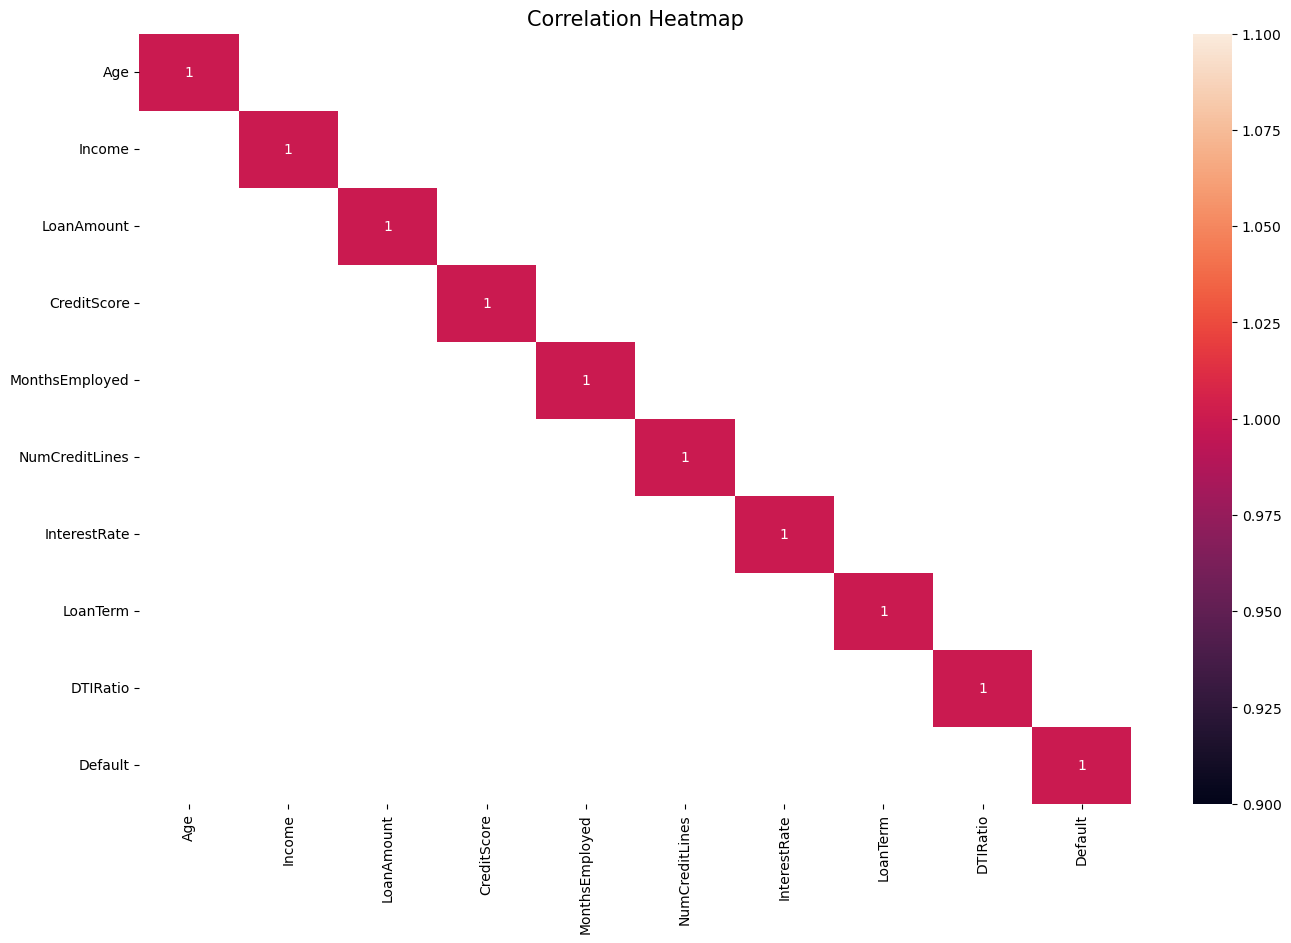

In [30]:
# Lets plot heatmap only for highly correlated features

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.9], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

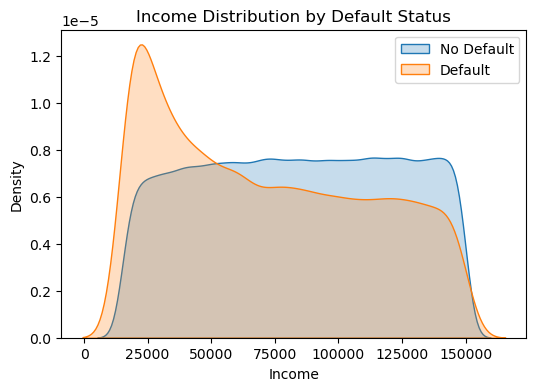

In [32]:
#Check if income has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["Income"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["Income"], label="Default", fill=True)
plt.title("Income Distribution by Default Status")
plt.legend()
plt.show()


In [34]:
###sns.pairplot(df,hue='Default',palette='bwr')

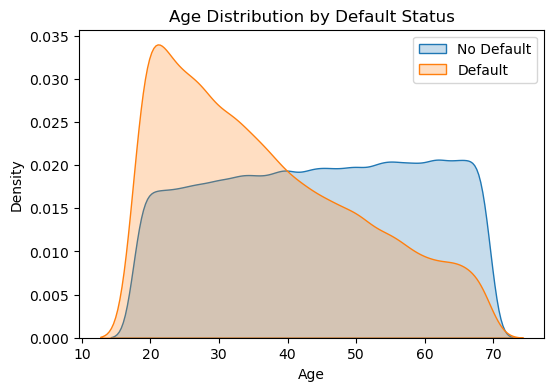

In [36]:
#Check if age has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["Age"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["Age"], label="Default", fill=True)
plt.title("Age Distribution by Default Status")
plt.legend()
plt.show()

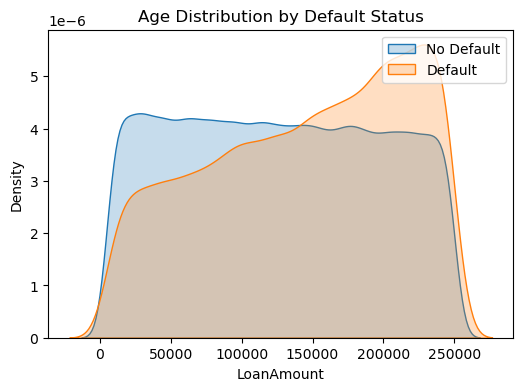

In [38]:
#Check if loan Amount has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["LoanAmount"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["LoanAmount"], label="Default", fill=True)
plt.title("Age Distribution by Default Status")
plt.legend()
plt.show()

In [39]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [42]:
# Binary Categorical Columns - Use Label Encoding
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
label_enc = LabelEncoder()

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

# Multi-category Columns - Use One-Hot Encoding
multi_cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)  

print(df.head()) 

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  Education_PhD  \
0               4         15.23        36      0.44  ...          False   
1               1          4.81        60      0.68  ...          False   
2               3         21.17        24      0.31  ...          False   
3               3          7.07        24      0.23  ...          False   
4               4          6.51        48      0.73  ...          False   

   EmploymentType_Part-time  EmploymentType_Self-employed  \
0                     False                         False   


In [44]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,False,True,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,False,False,True,False,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,False,True,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,False,False,True,False,False,False,False,False,False


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LoanID                        255347 non-null  object 
 1   Age                           255347 non-null  int64  
 2   Income                        255347 non-null  int64  
 3   LoanAmount                    255347 non-null  int64  
 4   CreditScore                   255347 non-null  int64  
 5   MonthsEmployed                255347 non-null  int64  
 6   NumCreditLines                255347 non-null  int64  
 7   InterestRate                  255347 non-null  float64
 8   LoanTerm                      255347 non-null  int64  
 9   DTIRatio                      255347 non-null  float64
 10  HasMortgage                   255347 non-null  int32  
 11  HasDependents                 255347 non-null  int32  
 12  HasCoSigner                   255347 non-nul

## Modeling

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     RandomizedSearchCV, 
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             precision_score, 
                             recall_score, 
                             RocCurveDisplay,
                             precision_recall_curve, 
                             average_precision_score,
                             roc_auc_score, 
                             roc_curve, auc)

*first we are bringing all the numeric variable to similar scale*

In [52]:
#create sample data
data = df.sample(n=3000, random_state=42).copy()

# Step 1: Data Preprocessing and Feature Selection

# Separate features (X) and target variable (y)
X = data.drop(['Default', 'LoanID'], axis=1)
y = data['Default']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
# Step 2: Feature Selection using Random Forest

# Train RandomForestClassifier to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Select features with importance > 0.03
selected_features = importance_df[importance_df['Importance'] > 0.03]['Feature']

# Filter selected features in train and test datasets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

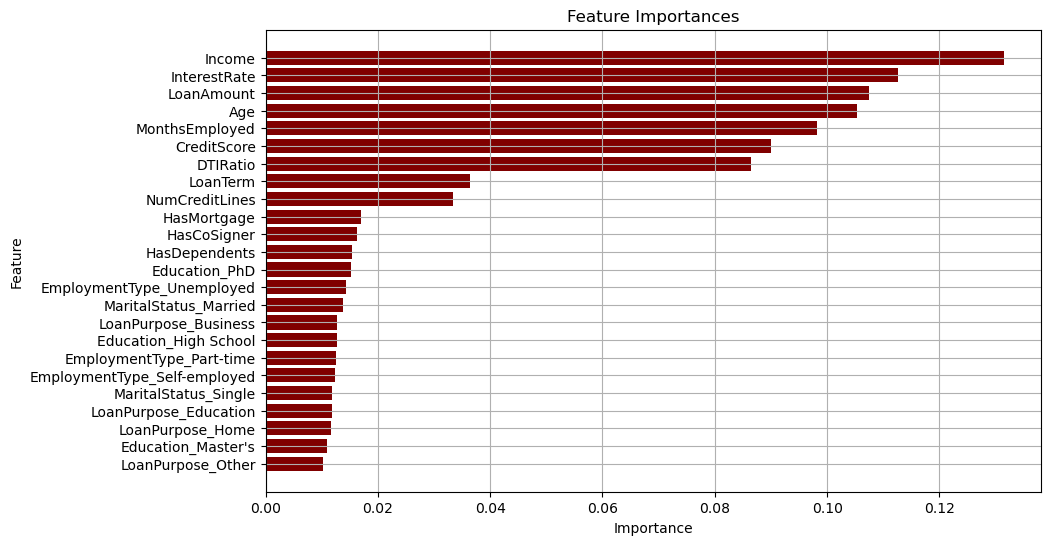

In [56]:
# Plot feature importances

# Sort importance_df by Importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [58]:
# Print the shapes of the resulting datasets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print the distribution of target classes in train and test sets
print("\nDistribution of classes in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))

X_train_selected shape: (2400, 9)
X_test_selected shape: (600, 9)
y_train shape: (2400,)
y_test shape: (600,)

Distribution of classes in y_train:
Default
0    0.89375
1    0.10625
Name: proportion, dtype: float64

Distribution of classes in y_test:
Default
0    0.856667
1    0.143333
Name: proportion, dtype: float64


In [60]:
# Apply SMOTE to balance the classes on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

In [62]:
# Print shapes after SMOTE
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (4290, 9)
y_train_resampled shape: (4290,)
X_test_selected shape: (600, 9)
y_test shape: (600,)


In [64]:
print("\nDistribution of classes in y_train resampled:")
print(y_train_resampled.value_counts(normalize=True))


Distribution of classes in y_train resampled:
Default
0    0.5
1    0.5
Name: proportion, dtype: float64


In [66]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree classifier
print("Decision Tree Classifier:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Test Accuracy:", accuracy_dt)
print("Test Precision:", precision_dt)
print("Test Recall:", recall_dt)
print("Test ROC AUC:", roc_auc_dt)


Decision Tree Classifier:
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test Accuracy: 0.7766666666666666
Test Precision: 0.23333333333333334
Test Recall: 0.2441860465116279
Test ROC AUC: 0.5549724006877206


In [68]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest classifier
print("Random Forest Classifier:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Test Accuracy:", accuracy_rf)
print("Test Precision:", precision_rf)
print("Test Recall:", recall_rf)
print("Test ROC AUC:", roc_auc_rf)

Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8033333333333333
Test Precision: 0.2647058823529412
Test Recall: 0.20930232558139536
Test ROC AUC: 0.5560130304949779


In [70]:
# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Print evaluation metrics for the best Logistic Regression model
print("Best Logistic Regression Model:")
print("Best Parameters:", grid_search_logreg.best_params_)
print("Test Accuracy:", accuracy_logreg)
print("Test Precision:", precision_logreg)
print("Test Recall:", recall_logreg)
print("Test ROC AUC:", roc_auc_logreg)

Best Logistic Regression Model:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.86
Test Precision: 1.0
Test Recall: 0.023255813953488372
Test ROC AUC: 0.5116279069767442


In [72]:
# Define the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best k-NN classifier with optimal parameter
best_knn_classifier = grid_search_knn.best_estimator_

# Predict on the test set and evaluate performance
y_pred_knn = best_knn_classifier.predict(X_test_selected)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Print evaluation metrics for k-NN classifier
print("k-Nearest Neighbors (k-NN) Classifier:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Test Accuracy:", accuracy_knn)
print("Test Precision:", precision_knn)
print("Test Recall:", recall_knn)
print("Test ROC AUC:", roc_auc_knn)

k-Nearest Neighbors (k-NN) Classifier:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.67
Test Precision: 0.17058823529411765
Test Recall: 0.3372093023255814
Test ROC AUC: 0.5314451180888607


In [106]:
# Define Gradient Boosting Classifier
gradboost_Classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_gradboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform GridSearchCV to find the best parameters
grid_search_gradboost = GridSearchCV(estimator=gradboost_Classifier, param_grid=param_grid_gradboost, cv=5, scoring='accuracy')
grid_search_gradboost.fit(X_train_resampled, y_train_resampled)
gradboost_Classifier.fit(X_train_resampled, y_train_resampled)

# Get the best GradientBoosting classifier with optimal parameters
best_gradboost_classifier = grid_search_gradboost.best_estimator_

# Predict on the test set and evaluate performance
y_pred_gradboost = best_gradboost_classifier.predict(X_test_selected)
accuracy_gradboost = accuracy_score(y_test, y_pred_gradboost)
precision_gradboost = precision_score(y_test, y_pred_gradboost)
recall_gradboost = recall_score(y_test, y_pred_gradboost)
roc_auc_gradboost = roc_auc_score(y_test, y_pred_gradboost)

# Print evaluation metrics for GradientBoosting classifier
print("Gradient Boosting Classifier:")
print("Best Parameters:", grid_search_gradboost.best_params_)
print("Test Accuracy:", accuracy_gradboost)
print("Test Precision:", precision_gradboost)
print("Test Recall:", recall_gradboost)
print("Test ROC AUC:", roc_auc_gradboost)

Gradient Boosting Classifier:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Test Accuracy: 0.82
Test Precision: 0.2608695652173913
Test Recall: 0.13953488372093023
Test ROC AUC: 0.5366935118993756


In [117]:
# Define the AdaBoost Classifier
ada_boost_Classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'algorithm': ['SAMME']
}

# Perform GridSearchCV to find the best parameters
grid_search_ada = GridSearchCV(estimator=ada_boost_Classifier, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train_resampled, y_train_resampled)
ada_boost_Classifier.fit(X_train_resampled, y_train_resampled)

# Get the best AdaBoost with optimal parametersprint("\n--- AdaBoost Classifier ---")
best_ada_classifier = grid_search_ada.best_estimator_

# Predict on the test set and evaluate performance
y_pred_ada = best_ada_classifier.predict(X_test_selected)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)

# Print evaluation metrics for AdaBoost classifier
print("AdaBoost Classifier:")
print("Best Parameters:", grid_search_ada.best_params_)
print("Test Accuracy:", accuracy_ada)
print("Test Precision:", precision_ada)
print("Test Recall:", recall_ada)
print("Test ROC AUC:", roc_auc_ada)

C:\Users\r_bho\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier:
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 200}
Test Accuracy: 0.6966666666666667
Test Precision: 0.24193548387096775
Test Recall: 0.5232558139534884
Test ROC AUC: 0.6244683739028143


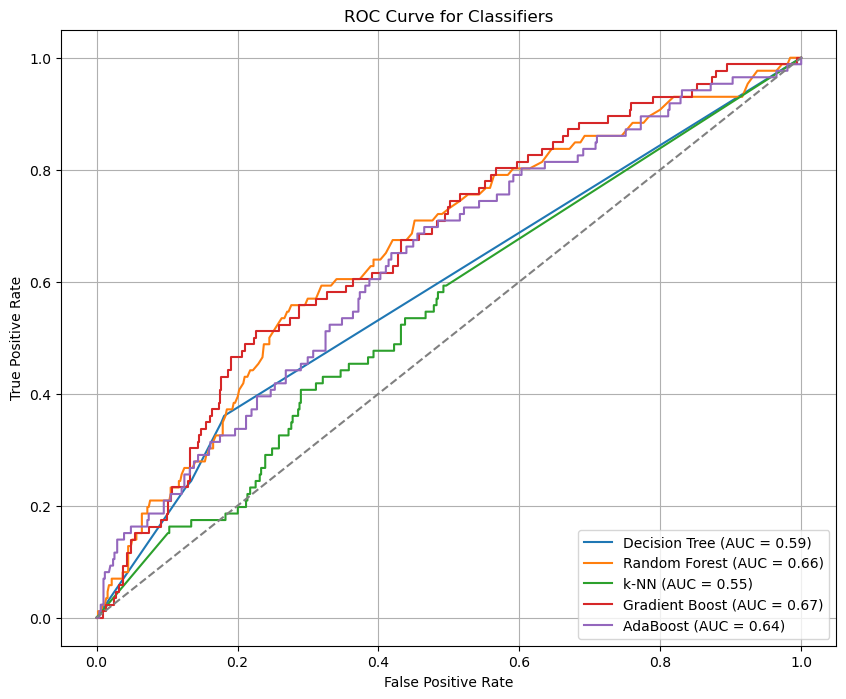

In [119]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
#    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Gradient Boost': gradboost_Classifier,
    'AdaBoost': ada_boost_Classifier
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict_proba(X_test_selected)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

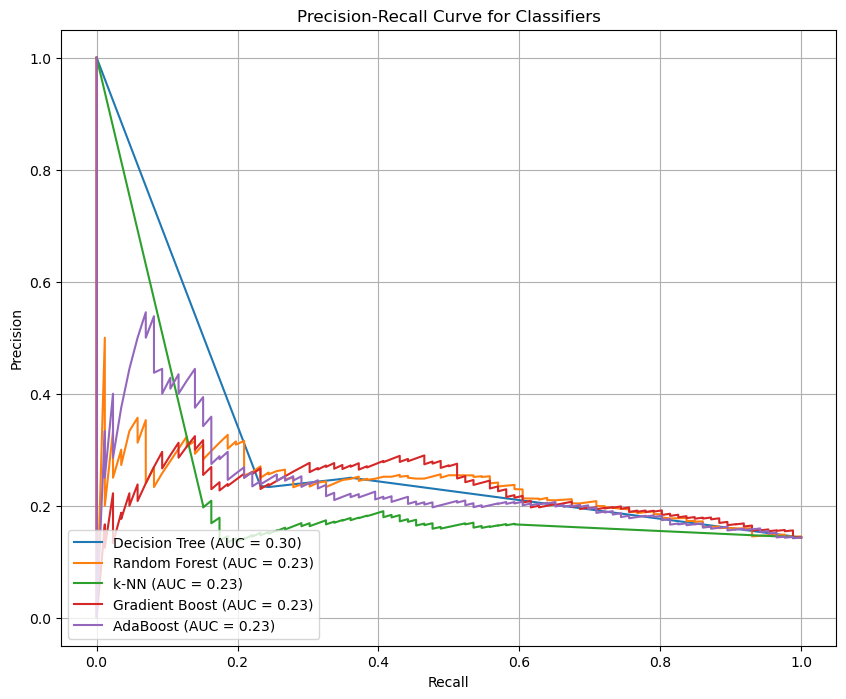

In [121]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
#    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Gradient Boost': gradboost_Classifier,
    'AdaBoost': ada_boost_Classifier
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict_proba(X_test_selected)[:, 1]
    
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    # Calculate PR AUC score
    pr_auc = auc(recall, precision)
    
    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Findings

In this analysis, we analysed the performance of six machine learning classifiers on provided dataset. 

1. Decision Tree Classifier - The Decision Tree classifier showed an accuracy of 77%

2. Random Forest Classifier - The Random Forest classifier showed an accuracy of 80%. 

3. Logistic Regression Model - The Logistic Regression showed highest accuracy score of 86% among all classifiers and also showed highest precision of 100%

4. k-Nearest Neighbors (k-NN) - KNN Classifier showed lowest accuracy of 67%. 

5. Gradient Boosting Classifier - Gradient Boosting Classifier showed accuracy of 82%. 

6. AdaBoost Classifier - AdaBoost Classifier showed accuracy of 69%

Summary
                                                                                                                                                         
Logistic Regression and Gradient Boosting Classifier showed higher accuracy but due to high precision Logistic Regression proved to be the best model fit.